In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
start = '2010-01-01'
end = ' 2022-06-01'

In [3]:
df= data.DataReader('AAPL','yahoo',start ,end)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421424


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-25,141.789993,138.339996,138.429993,140.520004,92482700.0,140.325089
2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.580551
2022-05-27,149.679993,145.259995,145.389999,149.639999,90978500.0,149.432434
2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.633545
2022-06-01,151.740005,147.679993,149.899994,148.710007,74286600.0,148.503723


In [70]:
df=df.reset_index()

In [71]:
df= df.drop( ['Date','Adj Close'], axis =1)

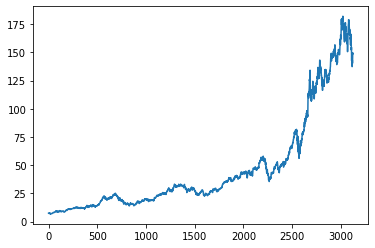

In [72]:
plt.plot(df.Close)

In [73]:
ma100= df.Close.rolling(100).mean()

In [74]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3121    164.3734
3122    163.9911
3123    163.6905
3124    163.4297
3125    163.1968
Name: Close, Length: 3126, dtype: float64

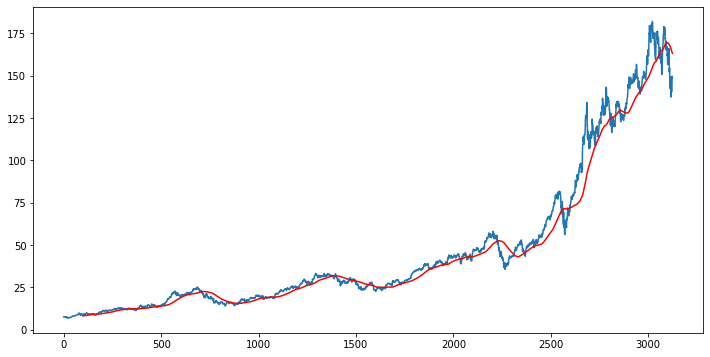

In [75]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [76]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3121    159.50665
3122    159.49625
3123    159.50000
3124    159.49870
3125    159.48665
Name: Close, Length: 3126, dtype: float64

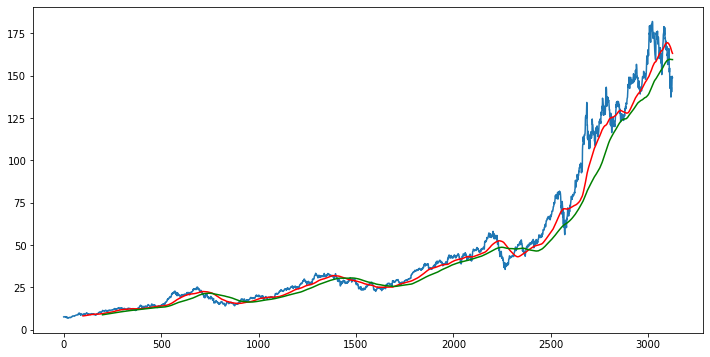

In [77]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [78]:
df.shape

(3126, 5)

In [79]:
#Splitting Data into Training and Testing

In [80]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

In [81]:
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [82]:
data_training.shape
data_testing.shape

(938, 1)

In [83]:
data_training.shape

(2188, 1)

In [84]:
data_testing.head()

,Close
2188,55.962502
2189,55.267502
2190,56.602501
2191,55.959999
2192,54.470001


In [85]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [87]:
data_training_array = scaler.fit_transform(data_training)

In [88]:
data_training_array

array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.97382101],
       [0.9648624 ],
       [0.9500807 ]])

In [89]:
data_training_array.shape

(2188, 1)

In [90]:
x_train=[]
y_train=[]

In [91]:
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [92]:
x_train
#now convert into dataframe

[array([[1.32814591e-02],
        [1.56135446e-02],
        [1.58766206e-02],
        [1.34521125e-02],
        [1.31748067e-02],
        [1.41702103e-02],
        [1.28406575e-02],
        [1.11413479e-02],
        [1.32245778e-02],
        [1.23571666e-02],
        [9.86866696e-03],
        [1.63458723e-02],
        [1.39924752e-02],
        [1.13901941e-02],
        [4.05268768e-03],
        [7.83520821e-03],
        [9.87577712e-03],
        [1.12551200e-02],
        [5.14762409e-03],
        [7.10066871e-06],
        [1.90546635e-03],
        [2.70889562e-03],
        [5.10496312e-03],
        [0.00000000e+00],
        [2.42448916e-03],
        [1.47175598e-03],
        [2.94353095e-03],
        [2.18275316e-03],
        [4.70680356e-03],
        [5.92262221e-03],
        [8.06984354e-03],
        [7.46549880e-03],
        [7.73566595e-03],
        [6.83980458e-03],
        [5.95105336e-03],
        [3.56209603e-03],
        [6.12170673e-03],
        [7.07443991e-03],
        [8.9

In [93]:
x_train , y_train=np.array(x_train), np.array(y_train)

In [94]:
x_train.shape

(2088, 100, 1)

# ML Model

In [95]:
import tensorflow as tf

In [96]:
from keras.layers import Dense , Dropout , LSTM

In [97]:
from keras.models import Sequential


In [98]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu', return_sequences= True,
              input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2)) 


model.add(LSTM(units = 60, activation ='relu', return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation ='relu', return_sequences= True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [99]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [100]:
model.compile(optimizer='adam', loss = 'mean_squared_error' )
model.fit(x_train , y_train , epochs = 50)

Epoch 1/50
66/66 [==============================] - 32s 371ms/step - loss: 0.0272
Epoch 2/50
66/66 [==============================] - 34s 514ms/step - loss: 0.0081
Epoch 3/50
66/66 [==============================] - 37s 553ms/step - loss: 0.0053
Epoch 4/50
66/66 [==============================] - 33s 503ms/step - loss: 0.0050
Epoch 5/50
66/66 [==============================] - 31s 471ms/step - loss: 0.0049
Epoch 6/50
66/66 [==============================] - 31s 472ms/step - loss: 0.0042
Epoch 7/50
66/66 [==============================] - 31s 471ms/step - loss: 0.0039
Epoch 8/50
66/66 [==============================] - 31s 475ms/step - loss: 0.0040
Epoch 9/50
66/66 [==============================] - 31s 473ms/step - loss: 0.0046
Epoch 10/50
66/66 [==============================] - 31s 468ms/step - loss: 0.0037
Epoch 11/50
66/66 [==============================] - 32s 479ms/step - loss: 0.0032
Epoch 12/50
66/66 [==============================] - 31s 474ms/step - loss: 0.0029
Epoch 13/50
6

In [101]:
model.save('keras_model.h5')

In [102]:
data_testing.head()

,Close
2188,55.962502
2189,55.267502
2190,56.602501
2191,55.959999
2192,54.470001


In [103]:
data_training.tail(100)

,Close
2088,43.200001
2089,41.430000
2090,41.310001
2091,40.735001
2092,40.912498
...,...
2183,57.090000
2184,56.717499
2185,55.775002
2186,55.325001


In [104]:
past_100_days = data_training.tail(100)

In [105]:
final_df = past_100_days.append(data_testing , ignore_index = True)

C:\Users\burje\AppData\Local\Temp\ipykernel_8516\3207694217.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing , ignore_index = True)


In [106]:
final_df.head()

,Close
0,43.200001
1,41.430000
2,41.310001
3,40.735001
4,40.912498


In [107]:
input_data = scaler.fit_transform(final_df)


In [108]:
input_data

array([[0.05224887],
       [0.04016386],
       [0.03934455],
       ...,
       [0.77898782],
       [0.77352565],
       [0.77263812]])

In [109]:
input_data.shape

(1038, 1)

In [110]:
x_test = []
y_test = []


for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [111]:
x_test , y_test =np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(938, 100, 1)
(938,)


In [112]:
#Making Predictions

In [113]:
y_predicted = model.predict(x_test)

30/30 [==============================] - 2s 40ms/step


In [114]:
y_predicted.shape

(938, 1)

In [115]:
y_test

array([0.13938723, 0.13464199, 0.14375694, 0.13937014, 0.1291969 ,
       0.1298114 , 0.13003328, 0.13286677, 0.12882138, 0.13416403,
       0.13655373, 0.13353247, 0.14126483, 0.14261331, 0.14520781,
       0.1486558 , 0.15341813, 0.14645388, 0.14013825, 0.13925067,
       0.14454211, 0.12660237, 0.12334215, 0.13641717, 0.1283093 ,
       0.13648544, 0.13484681, 0.12602203, 0.13163779, 0.13392506,
       0.13747546, 0.12443458, 0.13247419, 0.12649996, 0.11956987,
       0.1213792 , 0.13086968, 0.13660494, 0.1114449 , 0.10139113,
       0.10511224, 0.115661  , 0.11316891, 0.10630708, 0.08872578,
       0.08541435, 0.07614578, 0.08401469, 0.08763335, 0.07454126,
       0.05938379, 0.05904241, 0.05137833, 0.05535546, 0.05470684,
       0.06614321, 0.06377059, 0.06211488, 0.07276608, 0.0588888 ,
       0.05552616, 0.04489204, 0.04678673, 0.04513101, 0.04593327,
       0.04909106, 0.03975419, 0.03712555, 0.0407613 , 0.03191943,
       0.02498933, 0.0145771 , 0.00792012, 0.02556968, 0.02382

In [116]:
y_predicted

array([[0.1960495 ],
       [0.19715543],
       [0.19812086],
       [0.19895662],
       [0.19967303],
       [0.20025304],
       [0.20068023],
       [0.20094885],
       [0.20107087],
       [0.20105615],
       [0.20093225],
       [0.2007383 ],
       [0.20050475],
       [0.20027587],
       [0.20009492],
       [0.20000102],
       [0.20003143],
       [0.20022103],
       [0.20056811],
       [0.20103389],
       [0.20156625],
       [0.202129  ],
       [0.2026452 ],
       [0.203033  ],
       [0.20326918],
       [0.20333722],
       [0.20325562],
       [0.20305364],
       [0.2027407 ],
       [0.20233904],
       [0.20188142],
       [0.2014107 ],
       [0.20093155],
       [0.20045868],
       [0.19999188],
       [0.19950926],
       [0.19899353],
       [0.19846088],
       [0.19795299],
       [0.19744581],
       [0.1968764 ],
       [0.19619599],
       [0.19540422],
       [0.19451857],
       [0.19354942],
       [0.19246589],
       [0.19123176],
       [0.189

In [117]:
scaler.scale_

array([0.00682769])

In [118]:
scale_factor = 1/0.00682769 

In [119]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

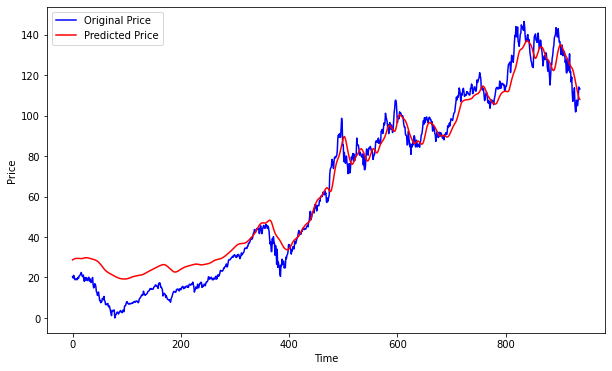

In [120]:
plt.figure(figsize = (10, 6))

plt.plot(y_test , 'b' , label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()